In [1]:
import numpy as np
import matplotlib.pylab as plt
#%matplotlib inline
import os
import seaborn as sns

import emcee
import corner

from astropy.modeling.models import Voigt1D
import scipy.optimize as op

import sys
sys.path.append('../plotting/')
import spec_helper_functions as shf
import new_fit_helper_functions as fhf
import fit_helper_functions as old_fhf

[16.0, 31.89871872614847, -28.348260387246288, -0.6931471805599453]


[0, 0.43829694204951286, 0, -0.6931471805599453]


/anaconda3/lib/python3.5/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/anaconda3/lib/python3.5/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


[13.885697826743126, 55.369973775568624, -20.46230492469021, -0.6931471805599453]


[0, -1.370109325678359, 0, -0.6931471805599453]


[13.723737001419067, 37.4977694278641, -25.404548014193413, 13.723737001419067, 37.4977694278641, 49.59099084153479, -0.6931471805599453]


[14.45204371213913, 26.62227481300516, -15.745852181464903, 14.45204371213913, 26.62227481300516, 37.498697444545414, -0.6931471805599453]


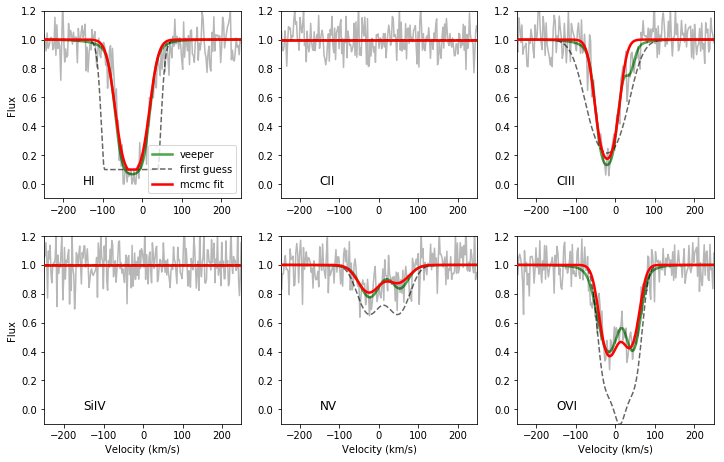

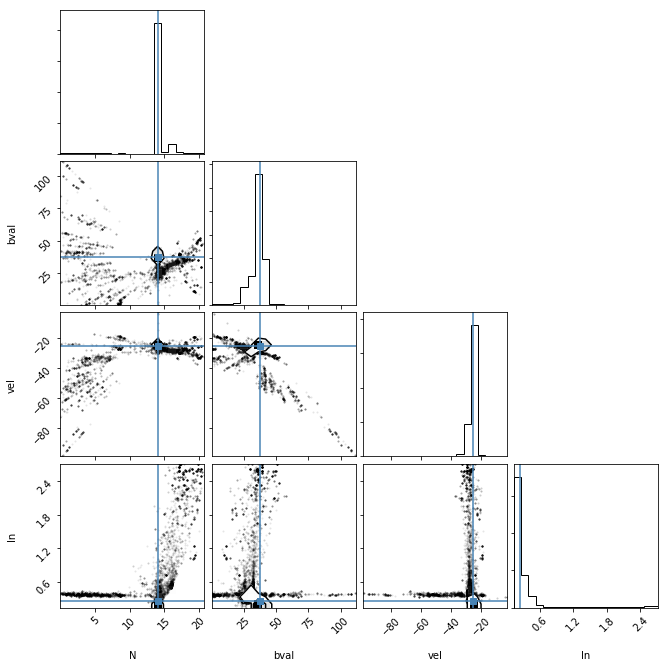

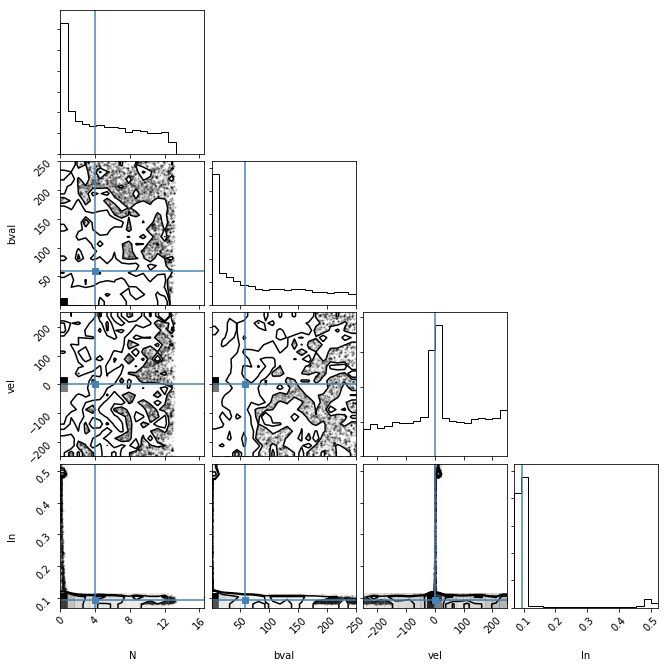

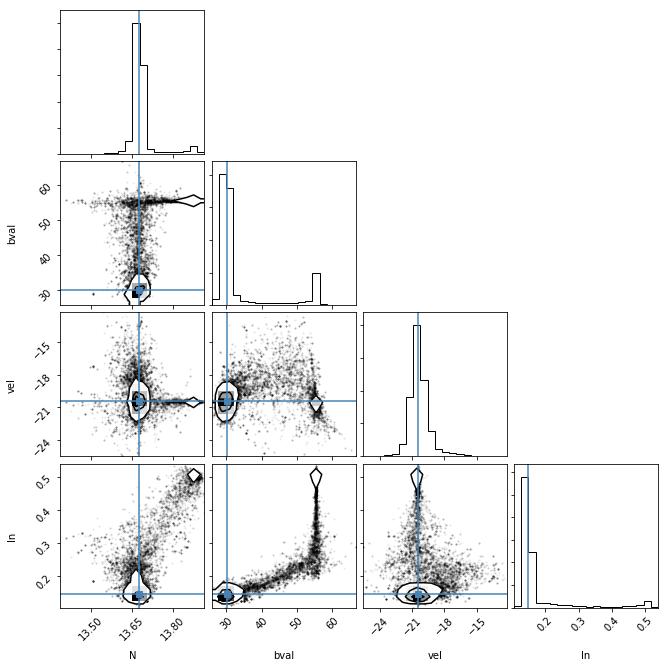

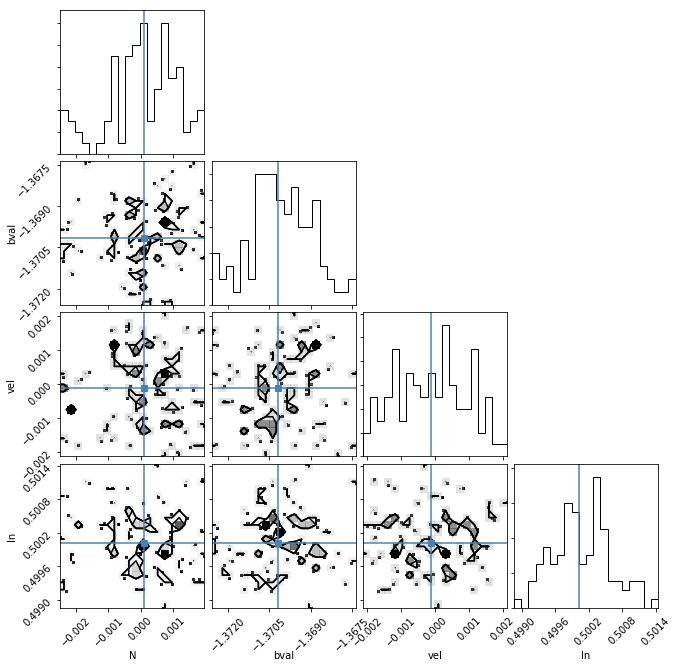

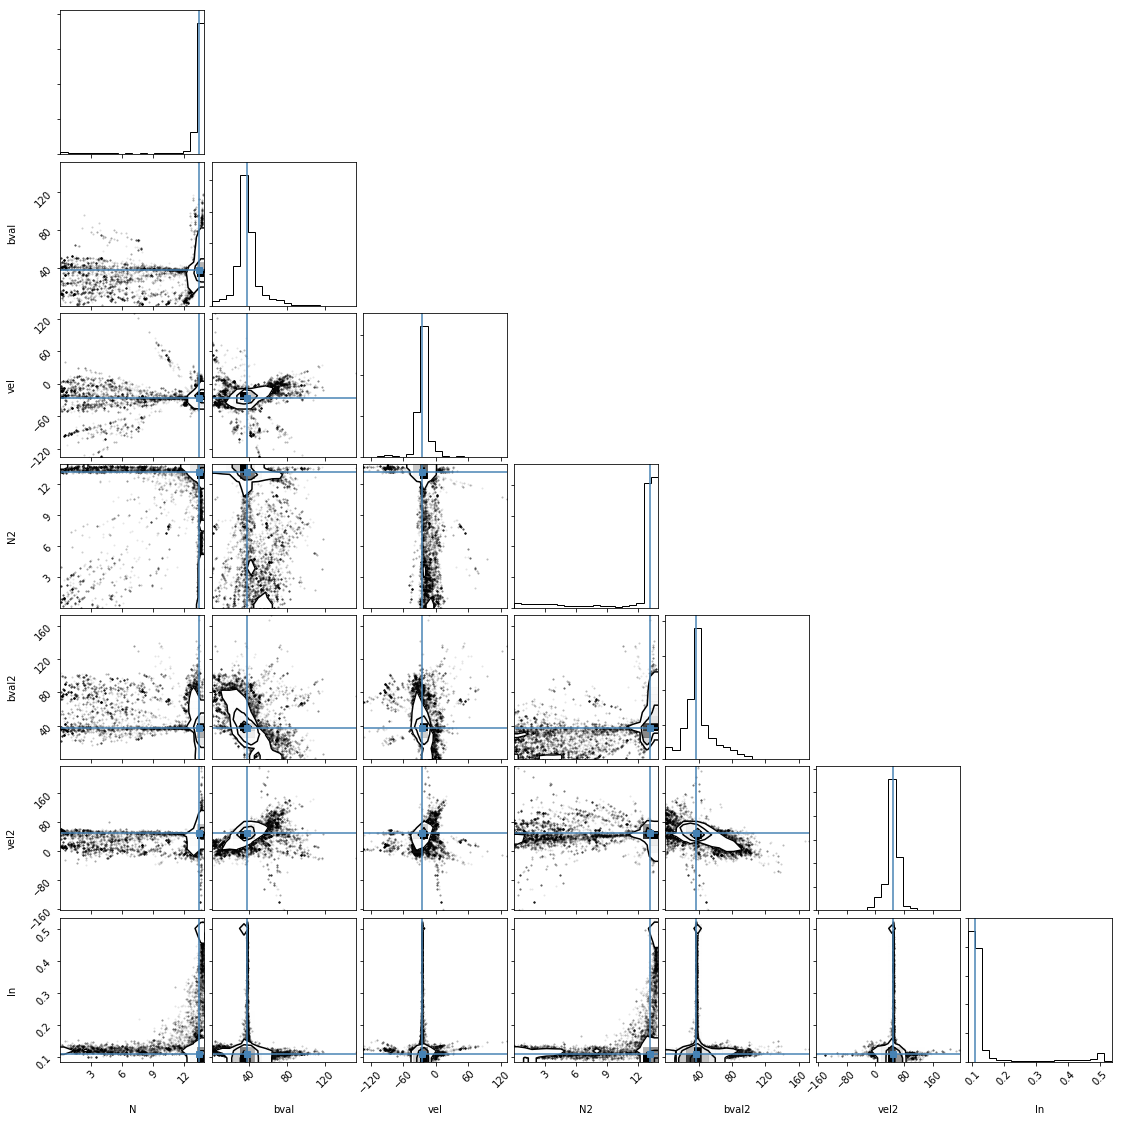

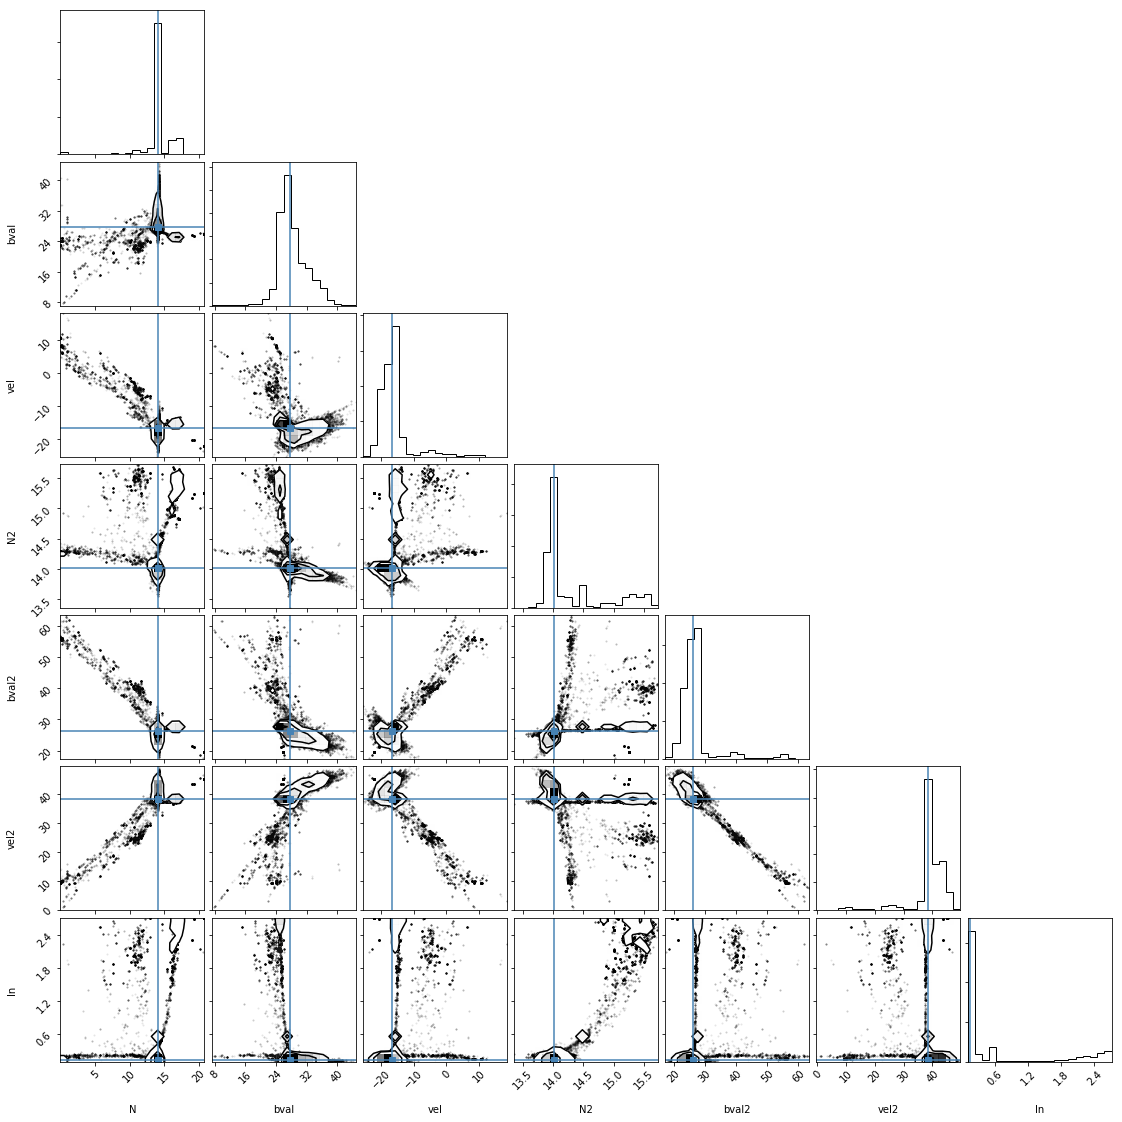

In [5]:
orientation = 'edge_theta0'
#orientation = 'face'
model = 'stream'
radius = 20
ion_list = ['HI', 'CII', 'CIII', 'SiIV', 'NV', 'OVI']
#ion_list = ['NV']
vv_list, flux_list, ferr_list, theta_list = fhf.fit_spectrum(model, orientation, radius, ion_list = ion_list, \
                                    corner_plot = True, use_errors = False, vmin = -250, vmax = 250, sat_lim = 0.05,\
                                    nwalkers = 200, niterations = 500, plot_veeper = True, save_fit = False)


In [5]:
for theta in theta_list:
    print(theta)

[13.430611572145246, 44.215625209366195, -22.712448110096258, 12.90856429921552, 40.448127191327195, 51.8975480162939, 0.11108834505150054]


In [ ]:
for ion, theta in zip(ion_list, theta_list):
    print(ion, theta)

In [ ]:
# things to do next time: 
# 1. fix eqwerr; check to see if it flags the same things as "non-detections" in the other workflow
# 2. idea for 2-component: find vcent (already do), and have the two components centered on it
ion_list = ['HI', 'CII', 'CIII', 'SiIV', 'NV', 'OVI']
orientation_list = ['face', 'edge_theta0', 'edge_theta1.0']#, 'edge_theta1.5']
model_list = ['stream']
radius_list = np.arange(20, 50, 10)
for radius in radius_list:
    for orientation in orientation_list:
        for model in model_list:
            vv_list, flux_list, ferr_list, theta_list = fhf.fit_spectrum(model, orientation, radius, ion_list = ion_list, \
                                                             use_errors = True, vmin = -200, vmax = 250, \
                                                             nwalkers = 200, niterations = 200)

In [ ]:
ncols = int(len(ion_list) / 2)
fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(12, 6))
for ion, vv, flux, ferr, theta in zip(ion_list, vv_list, flux_list, ferr_list, theta_list):
    plot_fit(vv_ion, flux_ion, ferr_ion, theta, ax = ax[row][col], label = ion, color = 'red')

    

In [ ]:
orientation_list = ['edge_theta1.0', 'edge_theta1.5']
model_list = ['stream', 'anisd']
radius_list = np.arange(10, 50, 10)
ion_list = ['H I', 'Mg II', 'C II', 'Si II', 'Si III', 'Si IV', 'N V']
ion_list = ['H I', 'C II', 'Si II', 'Si III', 'Si IV']

#ion_list = ['H I']
for orientation in orientation_list:
    for model in model_list:
        for radius in radius_list:
            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
            for ion in ion_list:
                vv, flux, vvfit, fluxfit = load_data(orientation, model, radius, ion)
                ax.plot(vv, flux, color = 'black', alpha = 0.2)
                ax.plot(vvfit, fluxfit, label = ion)
                ax.set_xlim(-200, 400)
                ax.legend()
                plt.savefig('../plots/velocity_%s_%s_%i.png'%(model, orientation, radius))
    